In [3]:
from tqdm import tqdm
import os
import twint
import pandas as pd
import numpy as np
from collections import defaultdict
from collections import Counter
import csv
import math
from math import log2
import matplotlib.pyplot as plt

# Model

In [4]:
matrix = np.load('matrix.npy')
bothMatrix = np.load('bothMatrix.npy')
targetArray = np.load('tagetArray.npy')
topTeamsListMessy = np.load('topTeamsList.npy')

def cleanTeamsList(teamsList):
    cleanList = []
    for user in teamsList:
        cleanUser = user[2:-3]
        cleanList.append(cleanUser)
    return cleanList

topTeamsList = cleanTeamsList(topTeamsListMessy)


In [5]:
from sklearn.naive_bayes import BernoulliNB

def evaluate(target, prediction):
    zipped = zip(target, prediction)
    FP = 0
    TP = 0
    FN = 0
    TN = 0
    for ans, pred in zipped:
        #print(ans, pred)
        if ans < pred:
            FP += 1
        elif ans > pred:
            FN += 1
        elif ans == 0:
            TP += 1
        elif ans == 1:
            TN += 1
        else:
            #print("error")
            pass
            
    return TP, TN, FP, FN


def train(trainingMatrix, trainingTargetArray, testMatrix, testTargetArray):
    model = BernoulliNB()
    model.fit(trainingMatrix, trainingTargetArray)

    prediction = model.predict(testMatrix)

    return evaluate(testTargetArray, prediction)

#evaluate(targetArray, matrix)

In [6]:
trainX = matrix[25:-25]
trainY = targetArray[25:-25]
testX = np.concatenate((matrix[:25], matrix[-25:]), axis = 0)
testY = np.concatenate((targetArray[:25], targetArray[-25:]), axis = 0)

In [7]:
TP, TN, FP, FN = train(trainX, trainY, testX, testY)

In [8]:
accuracy = 1 - ((FP+FN) / (TP+TN+FP+FN))
print(accuracy)

0.6799999999999999


# Entropies

In [9]:
def createSubgroups(matrix, targetArray, teamsList, teamSpec):
    listOfTeam = []
    listOfNotTeam = []
    teamTargetArray = []
    notTeamTargetArray = []
    
    for index, team in enumerate(teamsList):
        if team == teamSpec:
            teamIndex = index
    for index2, person in enumerate(matrix):
        if person[teamIndex] == 1:
            listOfTeam.append(person)
            if int(targetArray[index2]) == 1:
                teamTargetArray.append(1)
            else:
                teamTargetArray.append(0)
        else:
            listOfNotTeam.append(person)
            if int(targetArray[index2]) == 1:
                notTeamTargetArray.append(1)
            else:
                notTeamTargetArray.append(0)
    return listOfTeam, listOfNotTeam, teamTargetArray, notTeamTargetArray

listOfTeam, listOfNotTeam, teamTargetArray, notTeamTargetArray = createSubgroups(matrix, targetArray, topTeamsList, 'KamalaHarris')

print("KAMALAHARRIS")
print("Length of team matrix: ", len(listOfTeam))
print("Length of NOT team matrix: ", len(listOfNotTeam))


KAMALAHARRIS
Length of team matrix:  130
Length of NOT team matrix:  312


In [10]:
def findTrumpBiden(group, targetArray):
    countTrump = 0
    countBiden = 0
    for index, person in enumerate(group):
        if targetArray[index] == 1:
            countTrump += 1
        else:
            countBiden += 1
    return countTrump, countBiden
countTrump, countBiden = findTrumpBiden(listOfTeam, teamTargetArray)
print("POTUS Biden: ", countBiden)
print("POTUS Trump: ", countTrump)

POTUS Biden:  101
POTUS Trump:  29


In [11]:
def createDict(matrix, targetArray, topTeams):
    dictBiden = defaultdict(int)
    dictTrump = defaultdict(int)
    for index, team in enumerate(topTeams):
        listOfTeam, listOfNotTeam, teamTargetArray, notTeamTargetArray = createSubgroups(matrix, targetArray, topTeamsList, team)
        countTrump, countBiden = findTrumpBiden(listOfTeam, teamTargetArray)
        dictBiden[team] = countBiden
        dictTrump[team] = countTrump
    return dictBiden, dictTrump

BidenDict, TrumpDict = createDict(matrix, targetArray, topTeamsList)
print("Trump:", TrumpDict)
print("\nBiden", BidenDict)

Trump: defaultdict(<class 'int'>, {'POTUS': 68, 'BarackObama': 48, 'VP': 35, 'WhiteHouse': 35, 'FLOTUS': 29, 'KamalaHarris': 29, 'DonaldJTrumpJr': 27, 'IvankaTrump': 25, 'CNN': 24, 'cnnbrk': 23, 'Mike_Pence': 22, 'NASA': 21, 'HillaryClinton': 20, 'PressSec': 20, 'SidneyPowell1': 20, 'elonmusk': 19, 'nytimes': 18, 'TheEllenShow': 18, 'seanhannity': 18, 'kayleighmcenany': 17, 'jimmyfallon': 17, 'washingtonpost': 15, 'MichelleObama': 15, 'SenKamalaHarris': 14, 'BBCBreaking': 14, 'RudyGiuliani': 14, 'TrumpWarRoom': 13, 'AOC': 13, 'KimKardashian': 13, 'BillClinton': 13, 'KingJames': 13, 'TuckerCarlson': 13, 'BBCWorld': 13, 'BernieSanders': 13, 'LLinWood': 12, 'BillGates': 12, 'SpeakerPelosi': 12, 'dbongino': 12, 'ABC': 11, 'Twitter': 11, 'ewarren': 11, 'DrBiden': 11, 'espn': 11, 'IngrahamAngle': 11, 'NFL': 11, 'YouTube': 10, 'GOP': 10, 'JennaEllisEsq': 10, 'marklevinshow': 10, 'tedcruz': 9, 'NatGeo': 9, 'ArianaGrande': 9, 'StephenAtHome': 9, 'AP': 9, 'SportsCenter': 9, 'JudgeJeanine': 9, 'c

In [12]:
sortedTrumpDict = sorted(TrumpDict.items(), key = lambda x: x[1], reverse = False)
sortedBidenDict = sorted(BidenDict.items(), key = lambda x: x[1], reverse = False)

print("Trump:", sortedTrumpDict)
print("\nBiden", sortedBidenDict)

Trump: [('NICKIMINAJ', 1), ('EmmanuelMacron', 1), ('selenagomez', 2), ('whoisaddison', 2), ('kourtneykardash', 2), ('50cent', 2), ('charlidamelio', 3), ('FCBarcelona', 3), ('Drake', 3), ('khloekardashian', 3), ('dixiedamelio', 3), ('KylieJenner', 4), ('Oprah', 4), ('MeekMill', 4), ('ladygaga', 5), ('justinbieber', 5), ('ChelseaFC', 5), ('Cristiano', 6), ('MileyCyrus', 6), ('premierleague', 7), ('ChampionsLeague', 7), ('katyperry', 7), ('ManUtd', 7), ('tedcruz', 9), ('NatGeo', 9), ('ArianaGrande', 9), ('StephenAtHome', 9), ('AP', 9), ('SportsCenter', 9), ('JudgeJeanine', 9), ('cnni', 9), ('Reuters', 9), ('rihanna', 9), ('SenSanders', 9), ('SenWarren', 9), ('YouTube', 10), ('GOP', 10), ('JennaEllisEsq', 10), ('marklevinshow', 10), ('ABC', 11), ('Twitter', 11), ('ewarren', 11), ('DrBiden', 11), ('espn', 11), ('IngrahamAngle', 11), ('NFL', 11), ('LLinWood', 12), ('BillGates', 12), ('SpeakerPelosi', 12), ('dbongino', 12), ('TrumpWarRoom', 13), ('AOC', 13), ('KimKardashian', 13), ('BillClint

<BarContainer object of 84 artists>

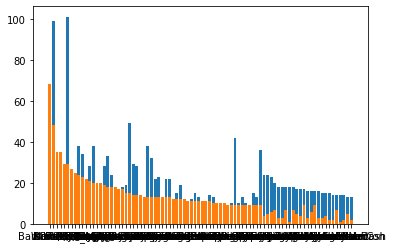

In [13]:
plt.bar(BidenDict.keys(), BidenDict.values(), tick_label = None)
plt.bar(TrumpDict.keys(), TrumpDict.values(), tick_label = None)

In [14]:
countedBidenDict = Counter(BidenDict)
topTenBiden = countedBidenDict.most_common(10)
bottomTenBiden = countedBidenDict.most_common()[-10:-1]
print(topTenBiden)
print()
countedTrumpDict = Counter(TrumpDict)
topTenTrump = countedTrumpDict.most_common(10)
bottomTenTrump = countedBidenDict.most_common()[-10:-1]
print(topTenTrump)

[('KamalaHarris', 101), ('BarackObama', 99), ('MichelleObama', 49), ('ArianaGrande', 42), ('POTUS', 38), ('CNN', 38), ('HillaryClinton', 38), ('AOC', 38), ('rihanna', 36), ('cnnbrk', 34)]

[('POTUS', 68), ('BarackObama', 48), ('VP', 35), ('WhiteHouse', 35), ('FLOTUS', 29), ('KamalaHarris', 29), ('DonaldJTrumpJr', 27), ('IvankaTrump', 25), ('CNN', 24), ('cnnbrk', 23)]


In [15]:
topTenBiden = dict(topTenBiden)
topTenTrump = dict(topTenTrump)
def allignTopTenTrump(topTenBiden, topTenTrump):
    trumperDict =  {}
    for key in topTenBiden.keys():
        listOfTeam, listOfNotTeam, teamTargetArray, notTeamTargetArray = createSubgroups(matrix, targetArray, topTeamsList, key)
        countTrump, countBiden = findTrumpBiden(listOfTeam, teamTargetArray)
        trumperDict[key] = countTrump
    return trumperDict

ourTrumperDict = allignTopTenTrump(topTenBiden, topTenTrump)
print(ourTrumperDict)

{'KamalaHarris': 29, 'BarackObama': 48, 'MichelleObama': 15, 'ArianaGrande': 9, 'POTUS': 68, 'CNN': 24, 'HillaryClinton': 20, 'AOC': 13, 'rihanna': 9, 'cnnbrk': 23}


In [16]:
def allignTopTenBiden(topTenBiden, topTenTrump):
    BidenDicked =  {}
    for key in topTenTrump.keys():
        listOfTeam, listOfNotTeam, teamTargetArray, notTeamTargetArray = createSubgroups(matrix, targetArray, topTeamsList, key)
        countTrump, countBiden = findTrumpBiden(listOfTeam, teamTargetArray)
        BidenDicked[key] = countBiden
    return BidenDicked

ourBidenDict = allignTopTenBiden(topTenBiden, topTenTrump)
print(ourBidenDict)

{'POTUS': 38, 'BarackObama': 99, 'VP': 10, 'WhiteHouse': 25, 'FLOTUS': 14, 'KamalaHarris': 101, 'DonaldJTrumpJr': 5, 'IvankaTrump': 7, 'CNN': 38, 'cnnbrk': 34}


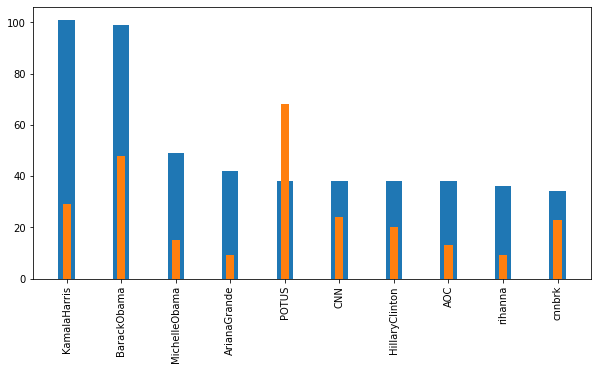

In [17]:
N = 10
topTenBiden = dict(topTenBiden)
topTenTrump = dict(topTenTrump)
#r1 = np.arange(len(topTenBiden.keys()))
#r2 = [x + width for x in r1]

plt.figure(figsize=(10,5))
width = 0.3
width2 = 0.15
#y_pos=np.arange(len(topTenTrump.values()))
plt.bar( topTenBiden.keys(), topTenBiden.values(), width)
plt.bar(ourTrumperDict.keys(), ourTrumperDict.values(), width2)
plt.xticks(rotation = 90)
plt.show()

In [52]:

topTenBiden = pd.DataFrame(dict(Biden=list(dict(topTenBiden).values()), Trump=list(dict(ourTrumperDict).values())), index=topTenBiden.keys())
bidenGraph = topTenBiden.plot.bar(title="Biden")

#topTenTrump = pd.DataFrame(dict(Biden=list(dict(ourBidenDict).values()), Trump=list(dict(topTenTrump).values()), index=topTenTrump.keys()))
#trumpGraph = topTenTrump.plot.bar(title="Trump")



ValueError: Shape of passed values is (10, 2), indices imply (2, 2)

In [ ]:
N = 10
topTenBiden = dict(topTenBiden)
topTenTrump = dict(topTenTrump)
#r1 = np.arange(len(topTenBiden.keys()))
#r2 = [x + width for x in r1]
plt.figure(figsize=(10,5))
width = 0.3
width2 = 0.15
#y_pos=np.arange(len(topTenTrump.values()))
plt.bar( topTenTrump.keys(), topTenTrump.values(), width)
plt.bar(ourBidenDict.keys(), ourBidenDict.values(), width2)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
def shannonEntropy(vector):

    listOfElements = []
    for p in vector:
        if p > 0:
            element = p*log2(p)
            listOfElements.append(element)
        else:
            element = 0
            listOfElements.append(element)
        entropy = -1 * sum(listOfElements)
    return entropy

In [ ]:
def findWeightedShannonEntropy(groupTeam, teamTargetArray, matrix):
    countTrumpTeam, countBidenTeam = findTrumpBiden(groupTeam, teamTargetArray)
    if (countTrumpTeam + countBidenTeam) != 0:
        probTrumpTeam = countTrumpTeam / (countTrumpTeam + countBidenTeam)
        probBidenTeam = countBidenTeam / (countTrumpTeam + countBidenTeam)
    else:
        probTrumpTeam = 0
        probBidenTeam = 0

    probTeamVector = [probTrumpTeam, probBidenTeam]
    sEntropy = shannonEntropy(probTeamVector)
    wae = sEntropy * (len(groupTeam)/len(matrix))
    return wae

waeTeam = findWeightedShannonEntropy(listOfTeam, teamTargetArray, matrix)
waeNotTeam = findWeightedShannonEntropy(listOfNotTeam, notTeamTargetArray, matrix)
print("Weighted Average Entropy of team of POTUS User: ", waeTeam)
print("Weighted Average Entropy of NOT team of POTUS User:", waeNotTeam)

In [ ]:
def getSplitWAE(groupTeam, groupNotTeam, teamTargetArray, notTeamTargetArray, matrix):
        wae1 = findWeightedShannonEntropy(groupTeam, teamTargetArray, matrix)
        
        wae2 = findWeightedShannonEntropy(groupNotTeam, notTeamTargetArray, matrix)

        return (wae1 + wae2)

In [ ]:
def createWAEDict(matrix, targetArray, topTeams):
    dictWAE = defaultdict(float)
    for index, team in enumerate(topTeams):
        groupTeam, groupNotTeam, TeamTargetArray, notTeamTargetArray = createSubgroups(matrix, targetArray, topTeams, team)
        teamWAE = getSplitWAE(groupTeam, groupNotTeam, TeamTargetArray, notTeamTargetArray, matrix)
        dictWAE[team] = teamWAE
    return dictWAE

newDict = createWAEDict(matrix, targetArray, topTeamsList)
print(newDict)

In [ ]:
def findLowestSplit(dictOfWAE, matrix, topTeams, targetArray):
    sortedDict = sorted(dictOfWAE.items(), key = lambda x: x[1], reverse = False)
    def sortedWAEDict(sortedDict):
        if int(len(sortedDict)) == 0:
            return None
        group1, group2, TargetArray1, TargetArray2 = createSubgroups(matrix, targetArray, topTeams, sortedDict[0][0])

        if int(len(group1)) != 0 and int(len(group2)) != 0:
            return str(sortedDict[0][0])
        else:
            del sortedDict[0]
            sortedWAEDict(sortedDict)
    team = sortedWAEDict(sortedDict)
    return team
"""def findLowestSplit(dictOfWAE, matrix, topTeams, targetArray):
    sortedDict = sorted(dictOfWAE.items(), key = lambda x: x[1], reverse = False)
    return sortedDict[0][0]"""
team = findLowestSplit(newDict, matrix, topTeamsList, targetArray)
print("Lowest entropy: ")
print(team)

In [ ]:
def createTree(matrix, topTeams, targetArray):
    if len(matrix) < 5:
        return ""
    waeDict = createWAEDict(matrix, targetArray, topTeams)
    user = findLowestSplit(waeDict, matrix, topTeams, targetArray)
    group1, group2, targetArray1, targetArray2 = createSubgroups(matrix, targetArray, topTeams, user)
    
    print()
    print("Split by: ", user)
    print("Weighted entropy: ", waeDict[user])
    
    if len(group1) >= len(group2):
        largestGroup = group1
        largestTA = targetArray1
        smallerGroup = group2
    else:
        largestGroup = group2
        largestTA = targetArray2
        smallerGroup = group1
        
    print("Bigger group size: ", np.array(largestGroup).shape)
    print("Smaller group size: ", np.array(smallerGroup).shape)
    
    return createTree(largestGroup, topTeams, largestTA)

createTree(matrix, topTeamsList, targetArray)

    
    